In [1]:
using Pkg
Pkg.activate("/home/shoram/Work/PhD_Thesis/SNImproved2bbSpectra/")

  Activating project at `~/Work/PhD_Thesis/SNImproved2bbSpectra`


In [2]:
using Revise
using StatsPlots, UnROOT, StatsBase, Polynomials  
using FHist, DataFramesMeta, Distributions 

In [3]:
ENV["COLUMNS"] = 2000
ENV["LINES"] = 20

20

In [4]:
include("/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl")
using .MiscFuncs

In [137]:
gr()
default(fmt = :jpg)
theme(
    :dao;
    size           = (800, 800),
    legend         = :topleft,
    guidefontsize  = 16,
    tickfontsize   = 12,
    titlefontsize  = 16,
    legendfontsize = 12,
    left_margin    = 4Plots.mm,
    right_margin   = 8Plots.mm,
    top_margin     = 4Plots.mm,
    bottom_margin  = 6Plots.mm,
    dpi            = 200,
    :colorbar_titlefontsize => 20,
    widen = :false
);


In [6]:
baseDir = "/home/shoram/Work/PhD_Thesis/Job17/"

dataDir = "/home/shoram/Work/PhD_Thesis/Job17/Data/kappa_-0.6_to_-0.7_0.01step/"
figDir = baseDir*"Figures/"

"/home/shoram/Work/PhD_Thesis/Job17/Figures/"

In [174]:
dfs = DataFrame[]

for (i,file) in enumerate(readdir(dataDir))
    f = ROOTFile( dataDir*file )
    kappa = parse(Float64, chop(file, head = 27,  tail = 5)) # get kappa from name file

    angles = LazyTree(f, "tree", ["theta", "phi", "reconstructedEnergy1", "reconstructedEnergy2"]) |> DataFrame
    @transform! angles :kappa = -1*kappa/100
    @transform! angles :ESum = :reconstructedEnergy1 + :reconstructedEnergy2
    
    push!(dfs, angles)
end

In [161]:
# dfs = DataFrame[]

# files= ["/home/shoram/Work/PhD_Thesis/Job17/Data/kappa_-0.9/MomPosEneThetaPhi_1e6E.root", "/home/shoram/Work/PhD_Thesis/Job17/Data/kappa_-0.6_to_-0.7_0.01step/MomPosEneThetaPhi_3e7E_k_m060.root"]

# for (i,file) in enumerate(files)
#     f = ROOTFile( file )
# #     kappa = parse(Float64, chop(file, head = 27,  tail = 5)) # get kappa from name file

#     angles = LazyTree(f, "tree", ["theta", "phi", "reconstructedEnergy1", "reconstructedEnergy2"]) |> DataFrame
# #     @transform! angles :kappa = -1*kappa/100
#     @transform! angles :kappa = i
#     @transform! angles :ESum = :reconstructedEnergy1 + :reconstructedEnergy2
    
#     push!(dfs, angles)
# end


In [162]:
for i in eachindex(dfs)
    @show nrow(dfs[i])
end

nrow(dfs[i]) = 88522
nrow(dfs[i]) = 2638944


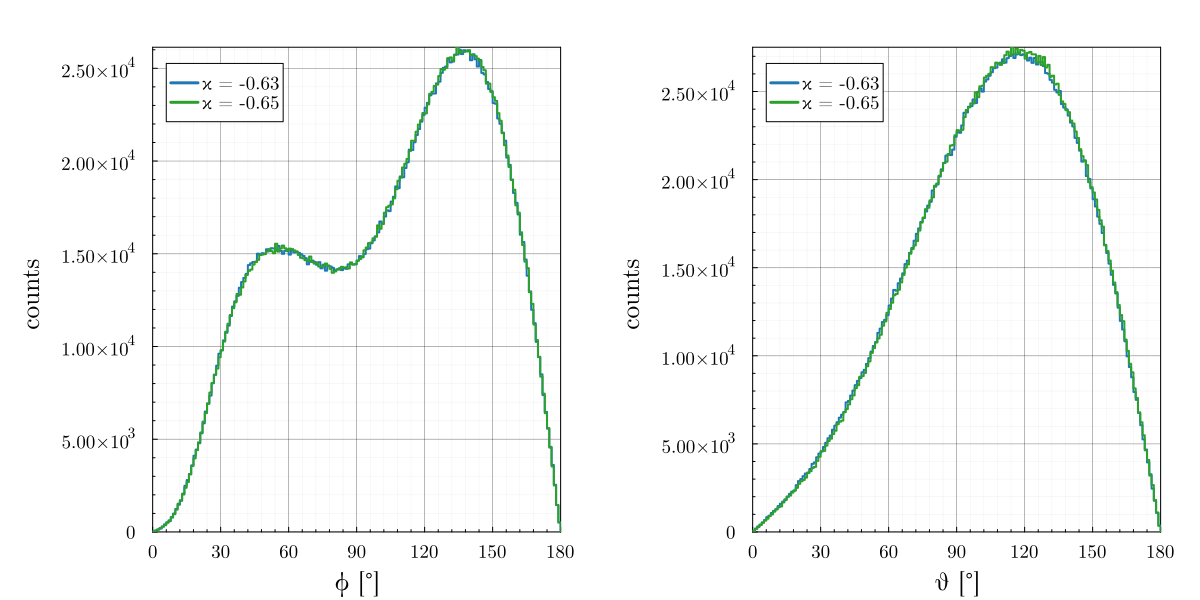

In [183]:
hist1DPhi = stephist()
hist1DTheta = stephist()
c = palette(:tab10)

for i in 4:2:6#:length(dfs)
    κ = dfs[i].kappa[1]
    stephist!(hist1DPhi, dfs[i].phi,  nbins = 180, label = "κ = $κ", 
            ylabel = "counts ", xlabel = "ϕ [°]", c = c[i-3], lw = 2, norm = :false, xlims=(0,180),
    )
    stephist!(hist1DTheta, dfs[i].theta,  nbins = 180, label = "κ = $κ",
            ylabel = "counts ", xlabel = "θ [°]", c = c[i-3], lw = 2, norm = :false, xlims = (0,180),
    )
    
end
plot(
    hist1DPhi,
    hist1DTheta,
    size = (1200, 600),
    top_margin=10Plots.mm,
    left_margin = 10Plots.mm
)   

In [184]:
savefig(
    joinpath(
        figDir, "kappas_-063_-065.png"
    )
)

"/home/shoram/Work/PhD_Thesis/Job17/Figures/kappas_-063_-065.png"

In [11]:
hPhi = StatsBase.fit(Histogram, dfs[1].phi, nbins = 60)
binContentPhi = hPhi.weights
edgesPhi = hPhi.edges

(0.0:5.0:180.0,)

In [12]:
binCentersPhi = midpoints(hPhi.edges[1])

2.5:5.0:177.5

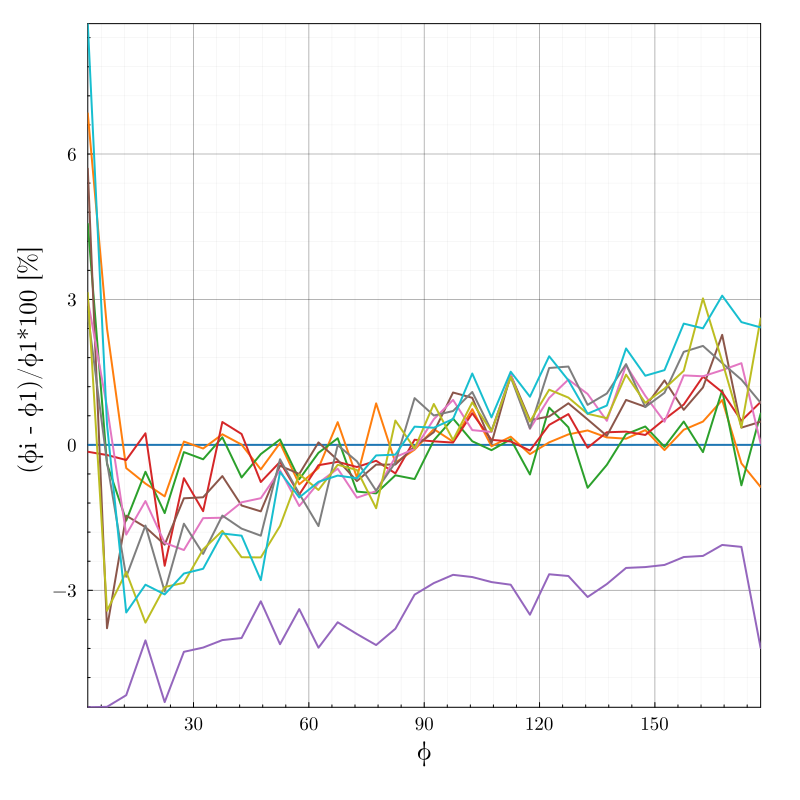

In [13]:
refBinContentPhi = StatsBase.fit(Histogram, dfs[1].phi, nbins = 60).weights
refBinContentTheta = StatsBase.fit(Histogram, dfs[1].theta, nbins = 60).weights

resPhi = scatter()
resTheta = scatter()
legend = plot(grid=false, frame =:none, label ="")
c = palette(:tab10)
for i in 1:length(dfs)
    κ = dfs[i].kappa[1]
    hPhi = StatsBase.fit(Histogram, dfs[i].phi, nbins = 60)
    binContentPhi = hPhi.weights
    binCentersPhi = midpoints(hPhi.edges[1])
    
    hTheta = StatsBase.fit(Histogram, dfs[i].theta, nbins = 60)
    binContentTheta = hTheta.weights
    binCentersTheta = midpoints(hTheta.edges[1])
    
    plot!(
        resPhi, 
        binCentersPhi,
        ( binContentPhi .- refBinContentPhi) ./ refBinContentPhi .* 100, 
        xlabel = "ϕ",
        ylabel = " (ϕi - ϕ1)/ϕ1*100 [%]",
        label  = "",
        legend = :top,
        c=c[i],
        lw= 2,
#         title= "residuals"
    )
    
    plot!(
        resTheta, 
        binCentersTheta,
        ( binContentTheta .- refBinContentTheta) ./ refBinContentTheta .* 100, 
        xlabel = "θ",
        ylabel = " (θi - θ1)/θ1*100 [%]",
        label  = "",
        legend = :bottom,
        c=c[i],
        lw= 2,
#         title= "residuals"
    )
    
    plot!(
        legend,
        [0], [0],
        label  = "κ = $κ",
    )
end
resPhi
# resTheta
# legend

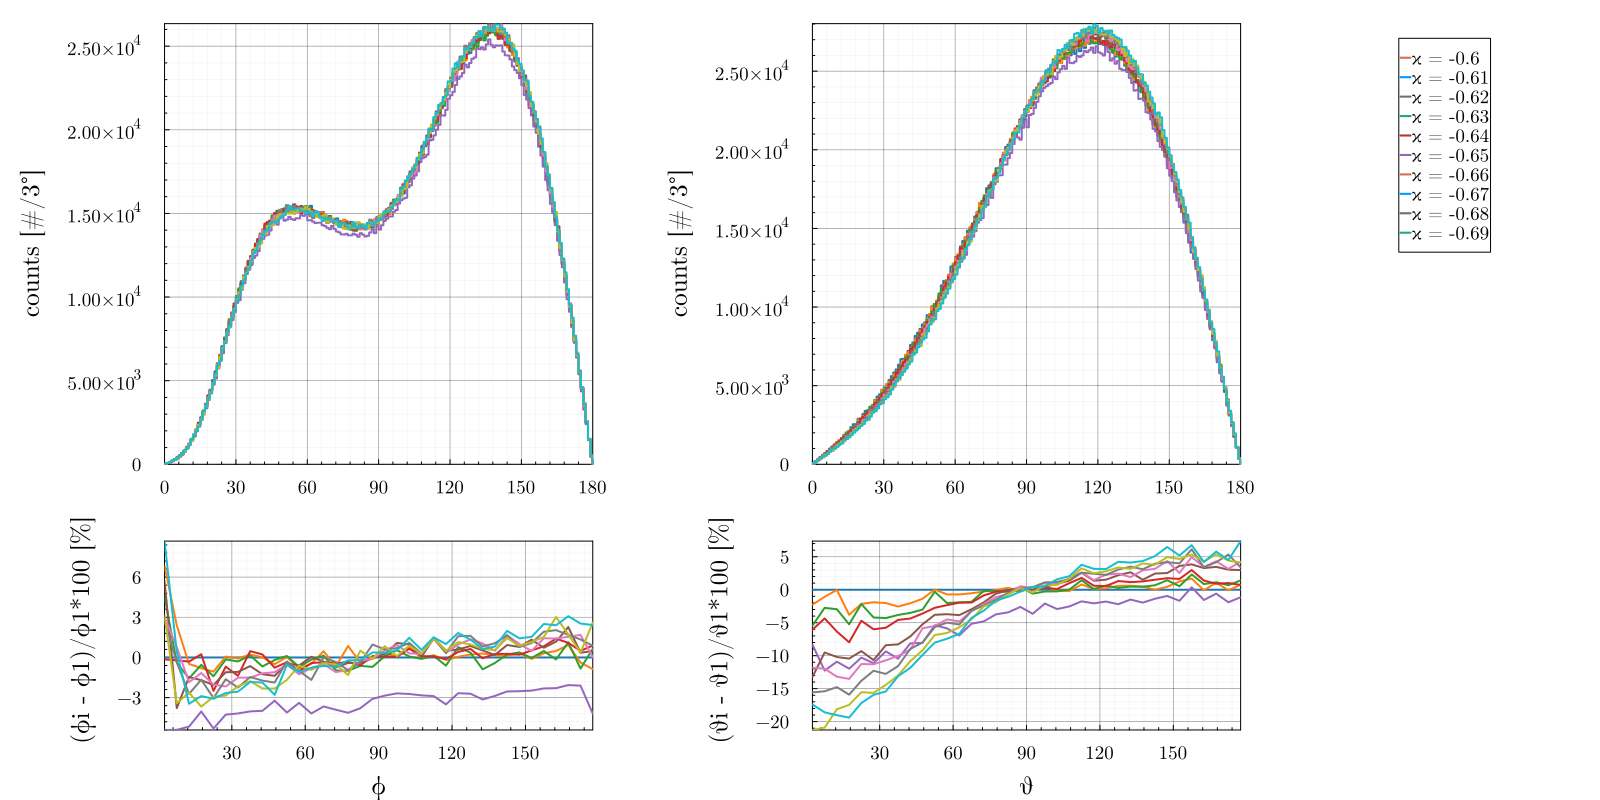

In [14]:
plot( 
    hist1DPhi,
    hist1DTheta,
    legend,
    resPhi,
    resTheta,
    right_margin = 12Plots.mm,
    left_margin = 12Plots.mm,
    
    size = (1600,800),
    layout = @layout [ a b e{0.15w}; c{0.3h} d _]
)

In [15]:
savefig(
    joinpath(
        figDir, "kappas_-06_to_-069_step001_h1dResiduals.png"
    )
)

"/home/shoram/Work/PhD_Thesis/Job17/Figures/kappas_-06_to_-069_step001_h1dResiduals.png"

In [16]:
hist2D = []

for i in 1:length(dfs)
    κ = dfs[i].kappa[1]
    
    sdf = @chain dfs[i] begin
       @subset (2500 .<= :ESum .<= 3500) 
    end
    
    h2d = histogram2d(
        sdf.theta, 
        sdf.phi, 
        lims=(0,180),
        nbins=60,
        title= "κ = $κ",
        xlabel = "θ",
        ylabel = "ϕ",
        c  = :coolwarm
    )
    
    push!(hist2D, h2d)
end


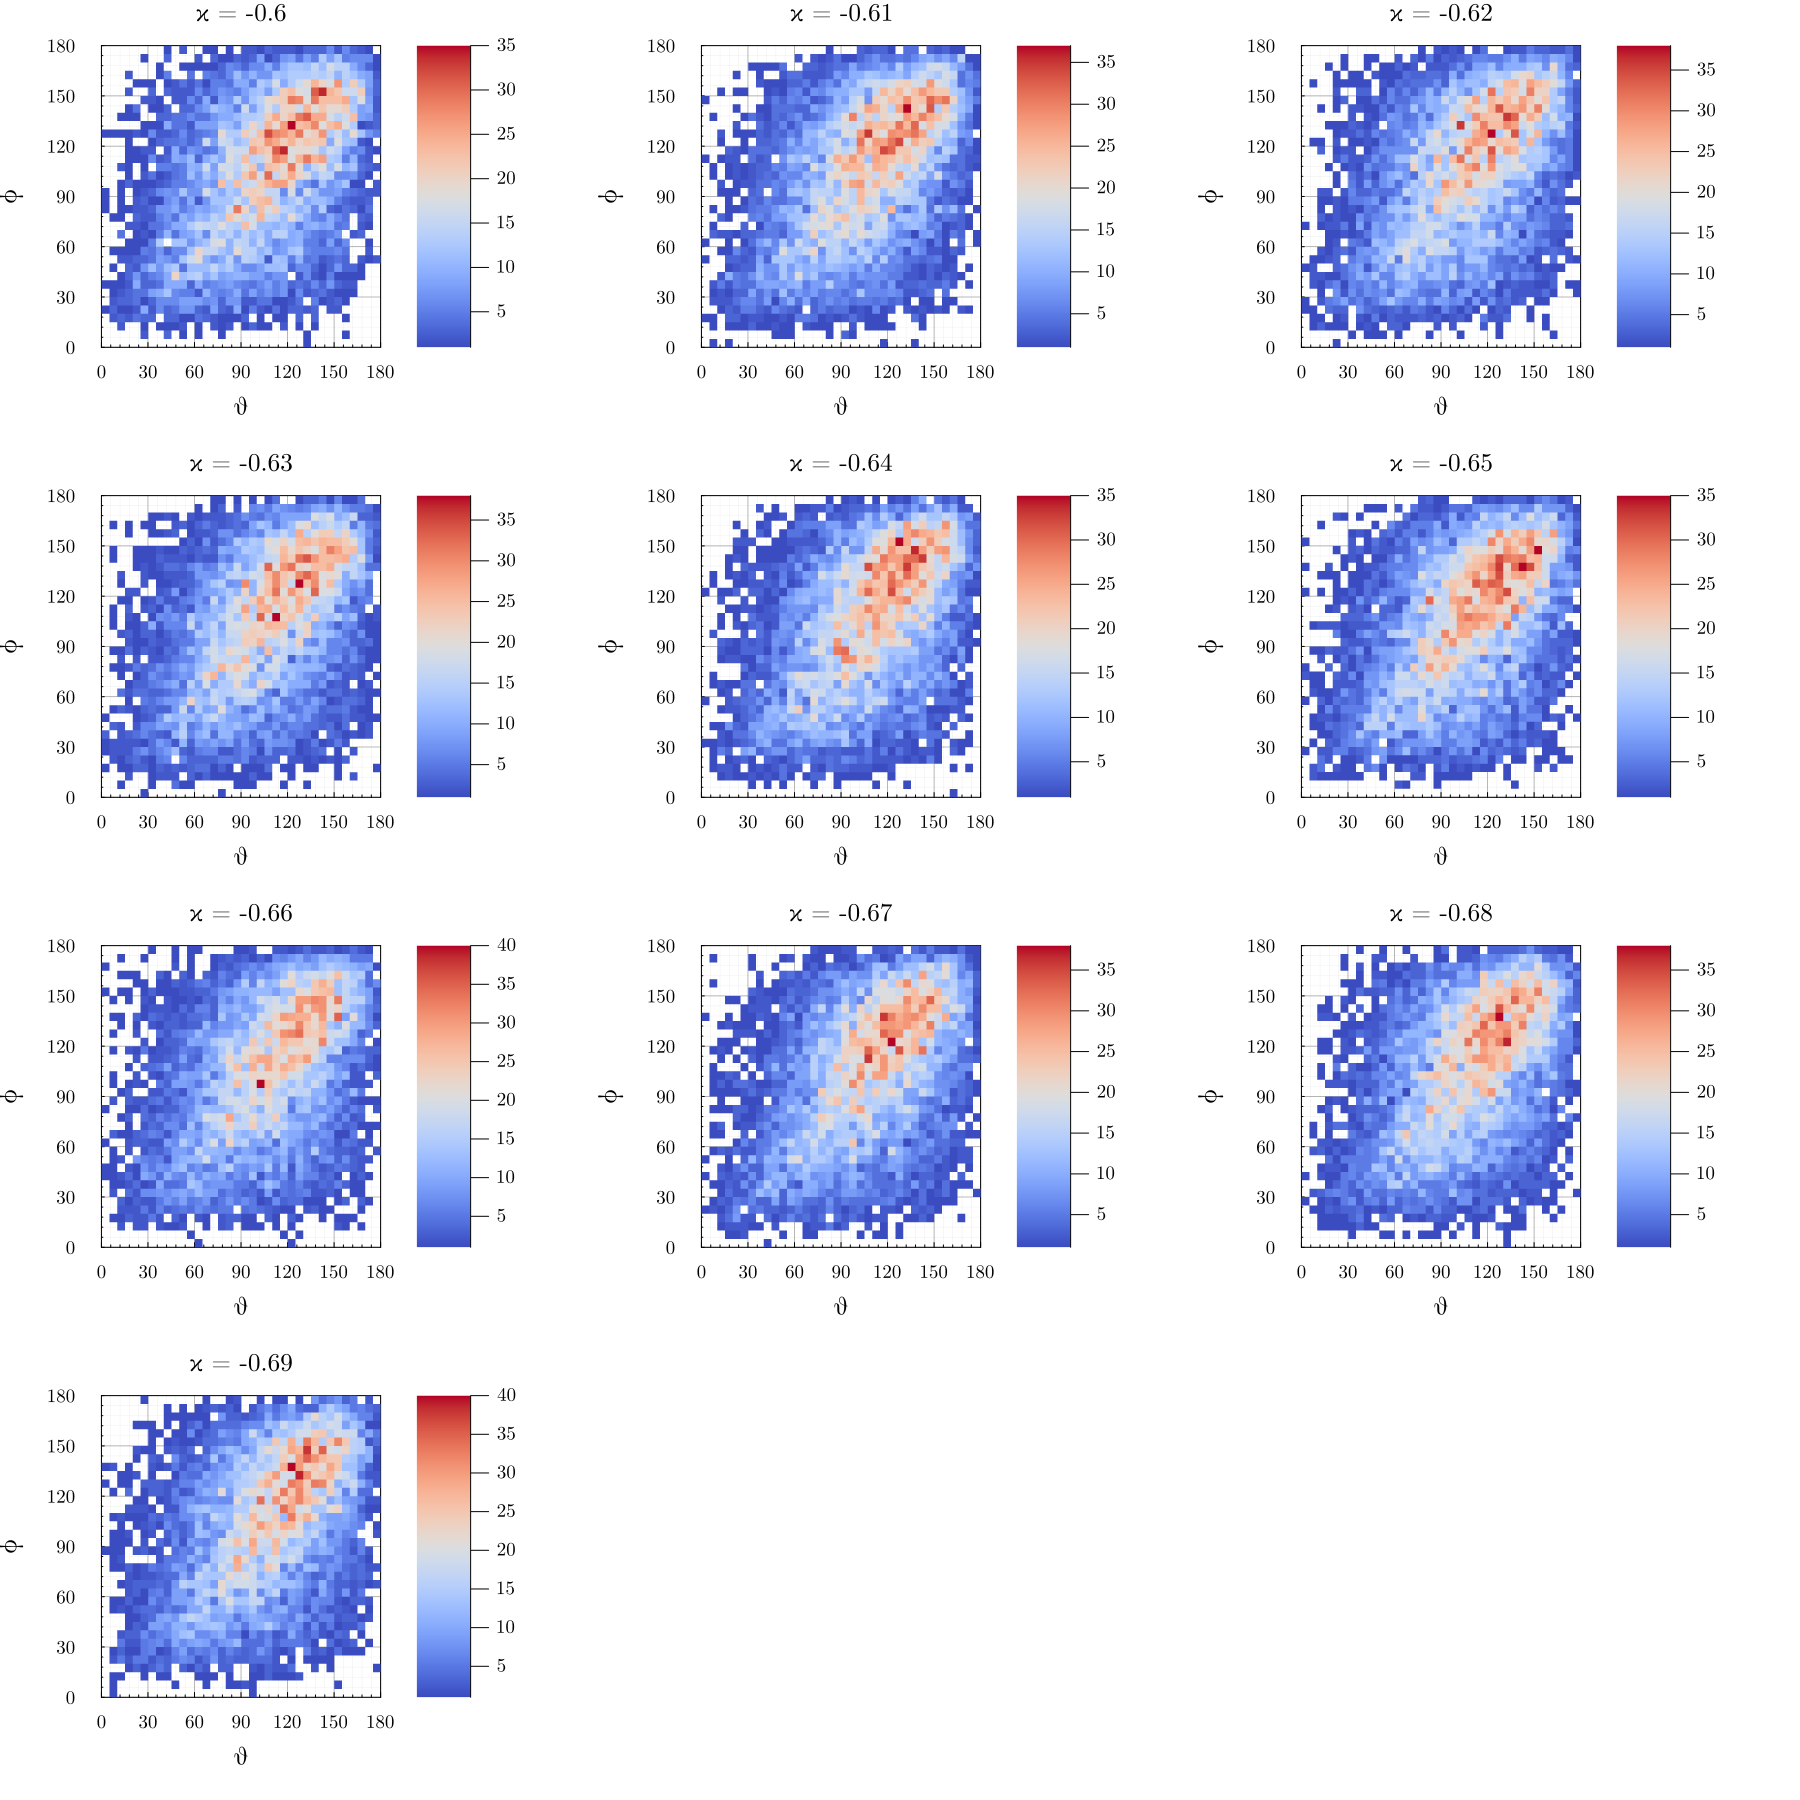

In [17]:
plot(
    hist2D[1], 
    hist2D[2],
    hist2D[3],
    hist2D[4],
    hist2D[5],
    hist2D[6],
    hist2D[7],
    hist2D[8],
    hist2D[9],
    hist2D[10],
    size = (1800, 1800), 
    top_margin=2Plots.mm,
#     aspect_ratio = 1,
    layout = @layout [ a b c ; d e f ; g h i ; j _ _ ]
)

In [18]:
savefig(
    joinpath(
        figDir, "kappas_-06_to_-0.69_step001_h2d.png"
    )
)

"/home/shoram/Work/PhD_Thesis/Job17/Figures/kappas_-06_to_-0.69_step001_h2d.png"

In [114]:

function get_bin_content(xVec::Vector{Real}, xMin::Real, xMax::Real; normed = "false")
    if ( xMax - xMin < 0 )
        @show "WARNING! xMin must be smaller than xMax!" 
        return -1.0
    end
    
    if(normed == "false")
        return length(filter(x -> xMin .<= x .<= xMax, xVec))
    elseif(normed == "true")
        norm = length(xVec)
        return length(filter(x -> xMin .<= x .<= xMax, xVec))/norm
    elseif(normed == "pdf")
        norm = length(xVec)*(xMax - xMin)
        return length(filter(x -> xMin .<= x .<= xMax, xVec))/norm
    end
    
end
    
function get_bin_content(xVec::Vector{Real}, xMin::Real, xMax::Real)
    return length(filter(x -> xMin .<= x .<= xMax, xVec))
end
        
function get_M(r::Real, nSigma::Real)
    return nSigma^2*((r+√r)/(1-r))^2
end
        
function get_Merror(r::Real, nSigma::Real, MCounts::Real, NCounts::Real)
    return nSigma^2 * ( (√r+1)/(1-r) )^3 * r * √( 1/MCounts + 1/NCounts )
end
    
function get_relMerror(M::Real, Merror::Real)
    return Merror/M
end

get_relMerror (generic function with 1 method)

In [144]:
Δϕ = 45

45

Find Mmin, where Mmin represents the absolute amount of events that must be the differents of two respective bins (of 2 kappa values) to be able to distinguish one from another within n Sigma. 

In [153]:
Mmin = [] # holds Mmin for each kappa. Where the difference kappa1 - kappai is taken into account
relMmin = [] # holds the relative error for Mmins
residuals = [] # holds the relative error for Mmins

for i in 2:length(dfs)
    sdf = @chain dfs[i] begin
       @subset (0 .<= :ESum .<= 3500) 
    end

    mat = zeros(Int(180/Δϕ),Int(180/Δϕ))
    relMat = zeros(Int(180/Δϕ),Int(180/Δϕ))
    resMat = zeros(Int(180/Δϕ),Int(180/Δϕ))
            
    for phiMin in Δϕ:Δϕ:180-Δϕ
        for phiMax in phiMin+Δϕ:Δϕ:180
        
            phi1 = get_bin_content(dfs[1].phi, phiMin, phiMax; normed="true") # get number of events in reference bin
            phi2 = get_bin_content(sdf.phi, phiMin, phiMax; normed="true") # get the number of events in that bin
            
            M = phi1 < phi2 ? phi1 : phi2
            N = phi1 < phi2 ? phi2 : phi1
            r = M/N
            
            resMat[Int(phiMax/Δϕ), Int(phiMin/Δϕ)] = -log(1-r) #abs((phi2 - phi1) / phi1 * 100) # residuals
            mat[Int(phiMax/Δϕ), Int(phiMin/Δϕ)] = get_M(r, 1.0) # M - the number of events needed to distinguish by nSigma
            relMat[Int(phiMax/Δϕ), Int(phiMin/Δϕ)] = get_Merror(r, 1.0, M, N) / get_M(r, 1)
        end
    end
    replace!( mat, 0.0 => NaN  ) # replace 0 with NaN so that it is not colored in heatmap
    replace!( relMat, 0.0 => NaN  ) # replace 0 with NaN so that it is not colored in heatmap
    replace!( resMat, 0.0 => NaN  ) # replace 0 with NaN so that it is not colored in heatmap
    push!(Mmin, mat)
    push!(relMmin, relMat)
    push!(residuals, resMat)
end

In [155]:
hmMmin = [] #heatmaps for Mmin
hmRelMmin = [] #heatmaps for relMmin
hmresiduals = [] #heatmaps for residuals

for i in 1:length(Mmin)
    kappa = -0.6 - i/100
    kappa = round(kappa, digits = 5)
    hm1 = heatmap( 
        (Δϕ/2:Δϕ:180-Δϕ/2), 
        (Δϕ/2:Δϕ:180-Δϕ/2), 
        Mmin[i] ./ 1e6,
        xlabel = "ϕmin",
#         ylabel = "ϕmax",
        colorbar_title= "Mmin * 1e6",
        title = "Mmin; κ = $kappa; Δϕ = $Δϕ",
        right_margin = 0Plots.mm,
        size = (800,600),
        c   = :jet,
        
    )
    
    hm2 = heatmap( 
        (Δϕ/2:Δϕ:180-Δϕ/2), 
        (Δϕ/2:Δϕ:180-Δϕ/2), 
        relMmin[i],
        xlabel = "ϕmin",
#         ylabel = "ϕmax",
        colorbar_title= "δM",
        title = "δM; κ$kappa; Δϕ = $Δϕ",
        right_margin = 0Plots.mm,
        size = (800,600),
        c   = :jet, 
    )
    
    hm3 = heatmap( 
        (Δϕ/2:Δϕ:180-Δϕ/2), 
        (Δϕ/2:Δϕ:180-Δϕ/2), 
        residuals[i],
        xlabel = "ϕmin",
        ylabel = "ϕmax",
        colorbar_title= "-log(1-r)",
        title = "residuals ; κ$kappa; Δϕ = $Δϕ",
        right_margin = 0Plots.mm,
        size = (800,600),
        c   = :jet, 
    )
    push!(hmMmin, hm1)
    push!(hmRelMmin, hm2)
    push!(hmresiduals, hm3)
end

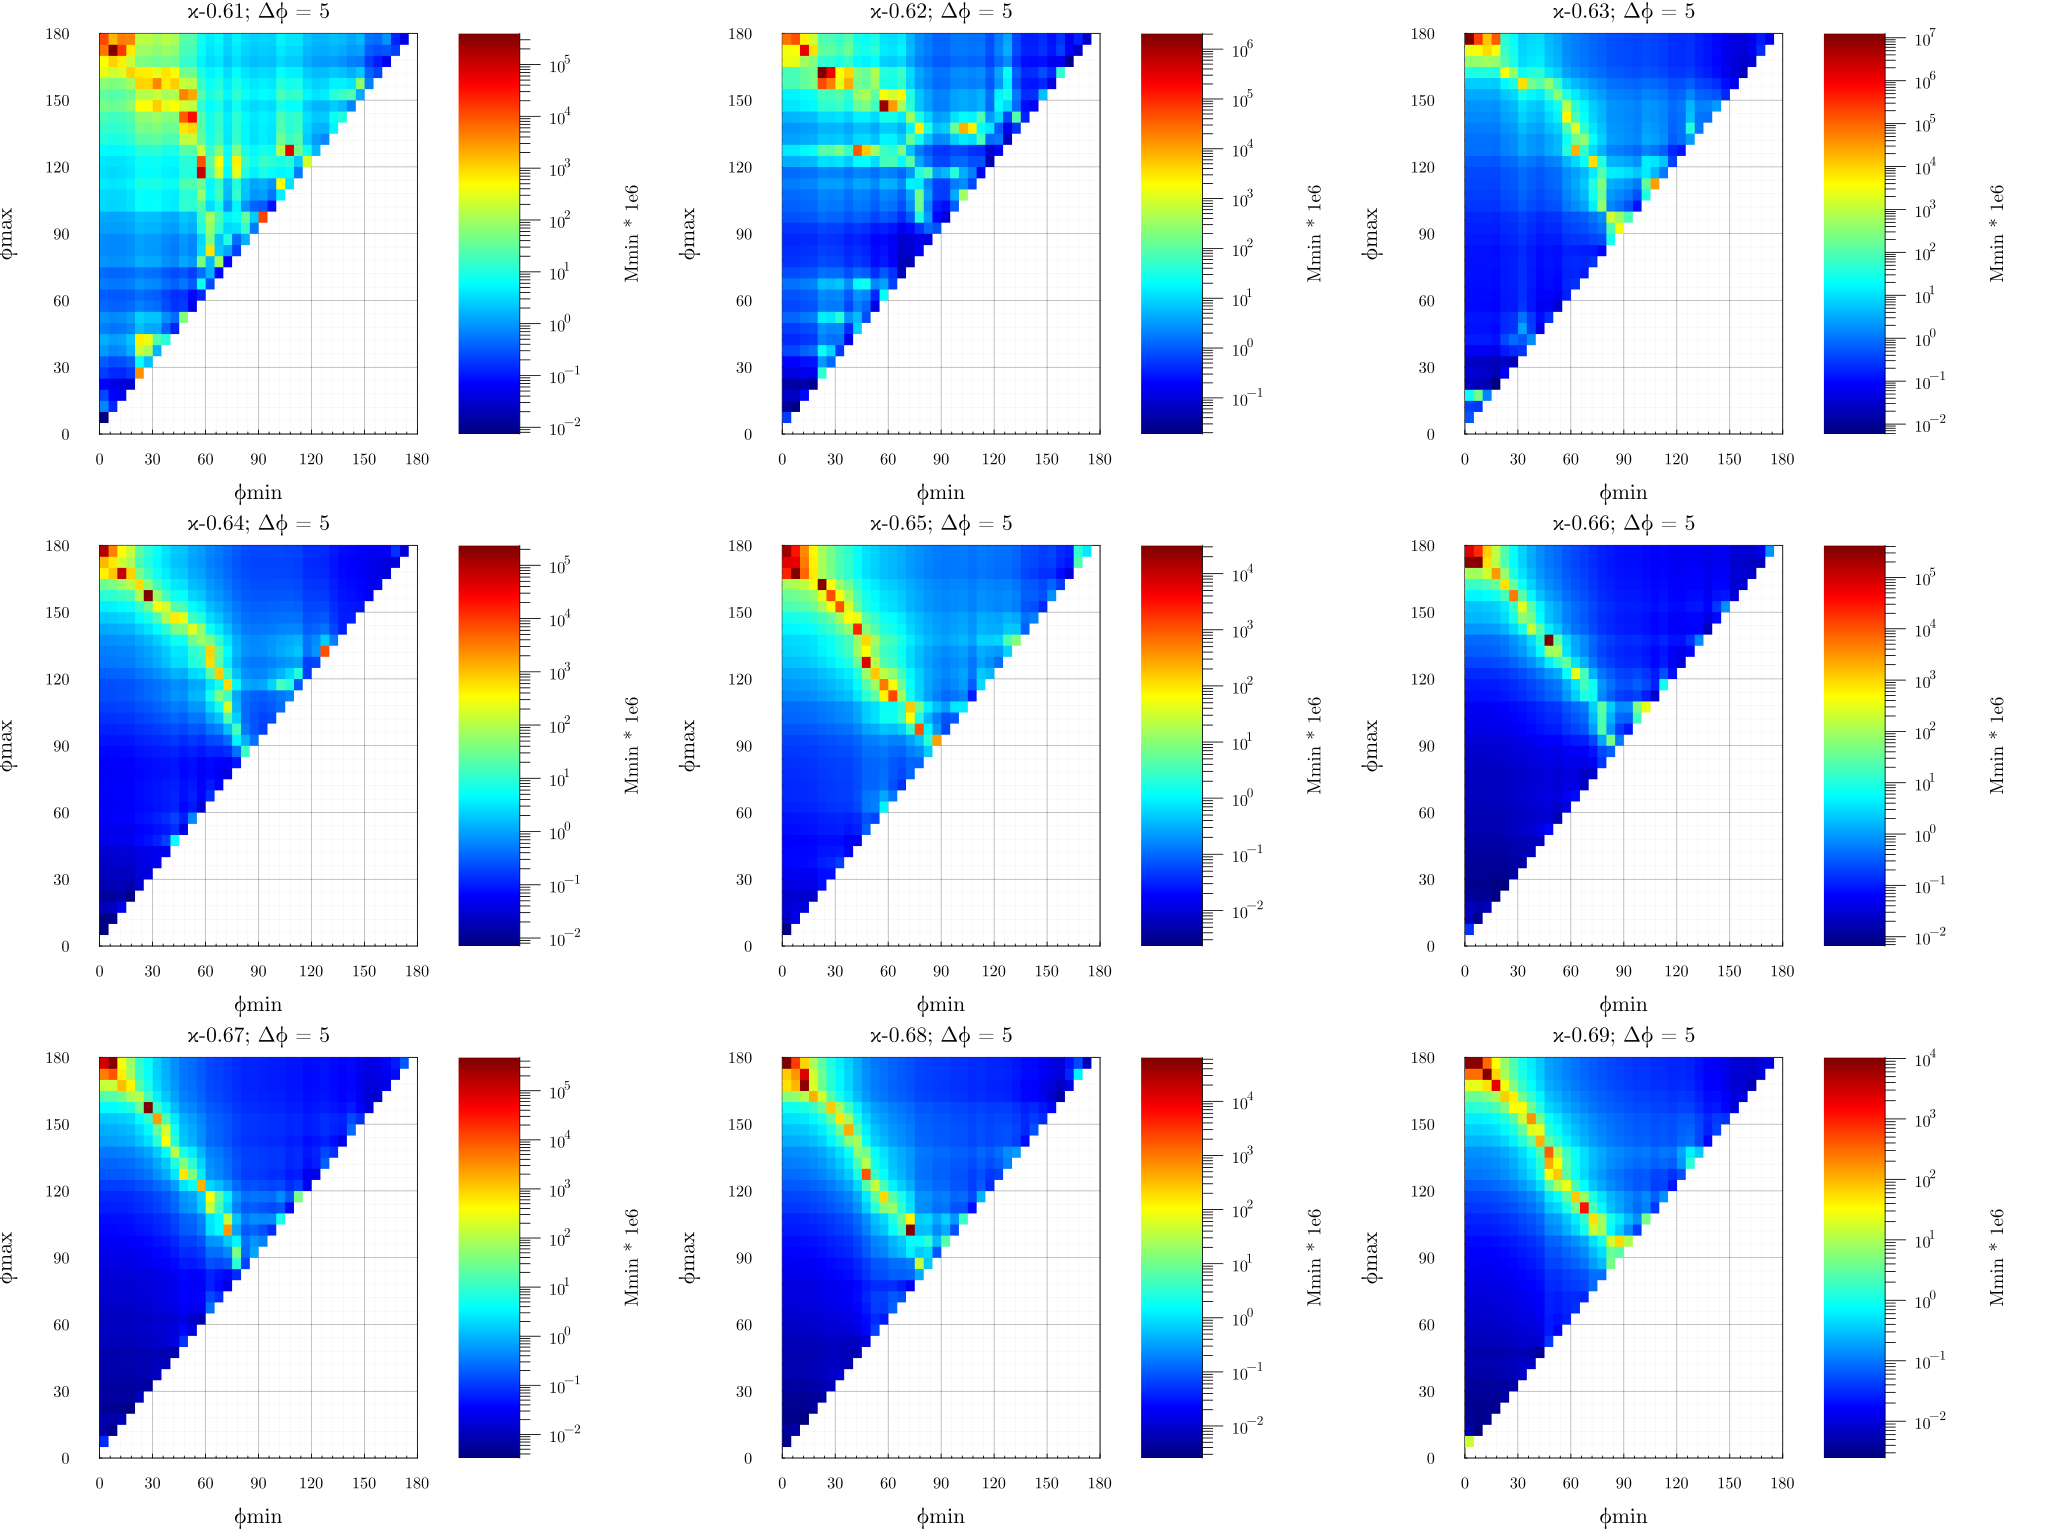

In [107]:
hmsResiduals = plot(
    hmMmin[1],
    hmMmin[2],
    hmMmin[3],
    hmMmin[4],
    hmMmin[5],
    hmMmin[6],
    hmMmin[7],
    hmMmin[8],
    hmMmin[9],
    size = (2400, 1800), 
    top_margin=2Plots.mm,
    left_margin=8Plots.mm,
    colorbar_scale = :log10,
    layout = @layout [ a b c ; d e f ; g h i ]
)

In [103]:
savefig(
    joinpath(
        figDir, "kappas_-06_to_-0.69_Ms5_E2000-3500.png"
    )
)

"/home/shoram/Work/PhD_Thesis/Job17/Figures/kappas_-06_to_-0.69_Ms5_E2000-3500.png"

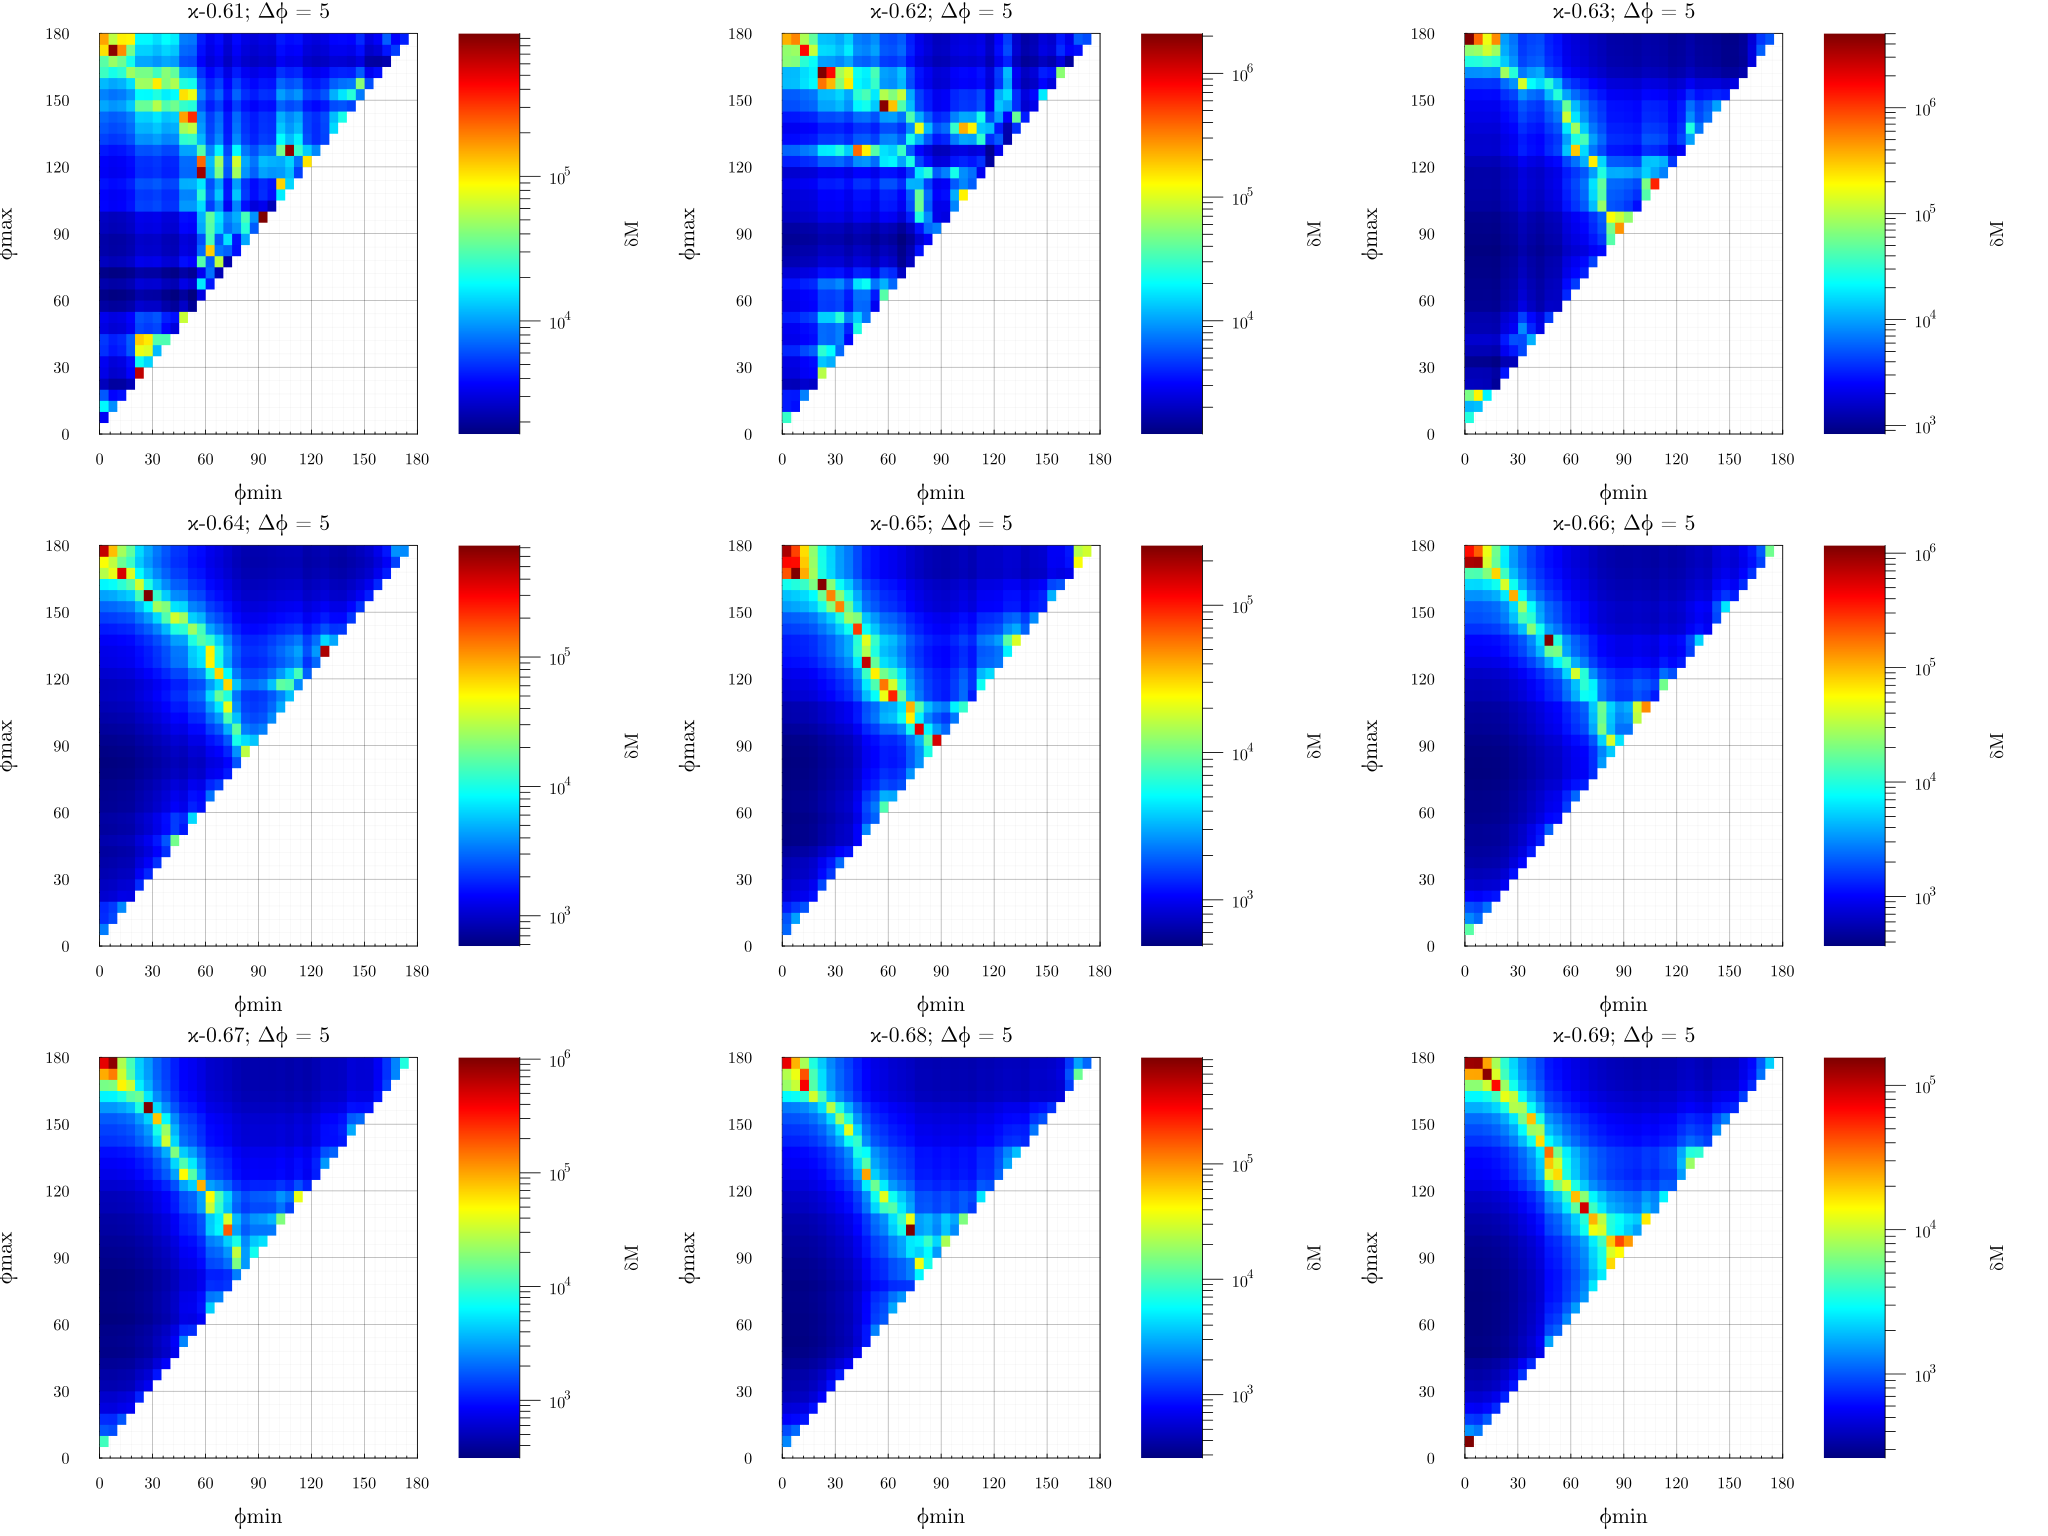

In [108]:
hmsRelatives = plot(
    hmRelMmin[1],
    hmRelMmin[2],
    hmRelMmin[3],
    hmRelMmin[4],
    hmRelMmin[5],
    hmRelMmin[6],
    hmRelMmin[7],
    hmRelMmin[8],
    hmRelMmin[9],
    size = (2400, 1800), 
    top_margin=2Plots.mm,
    left_margin=8Plots.mm,
    colorbar_scale = :log10,
    layout = @layout [ a b c ; d e f ; g h i ]
)

In [105]:
savefig(
    joinpath(
        figDir, "kappas_-06_to_-0.69_MsRelative_E2000-3500.png"
    )
)

"/home/shoram/Work/PhD_Thesis/Job17/Figures/kappas_-06_to_-0.69_MsRelative_E2000-3500.png"

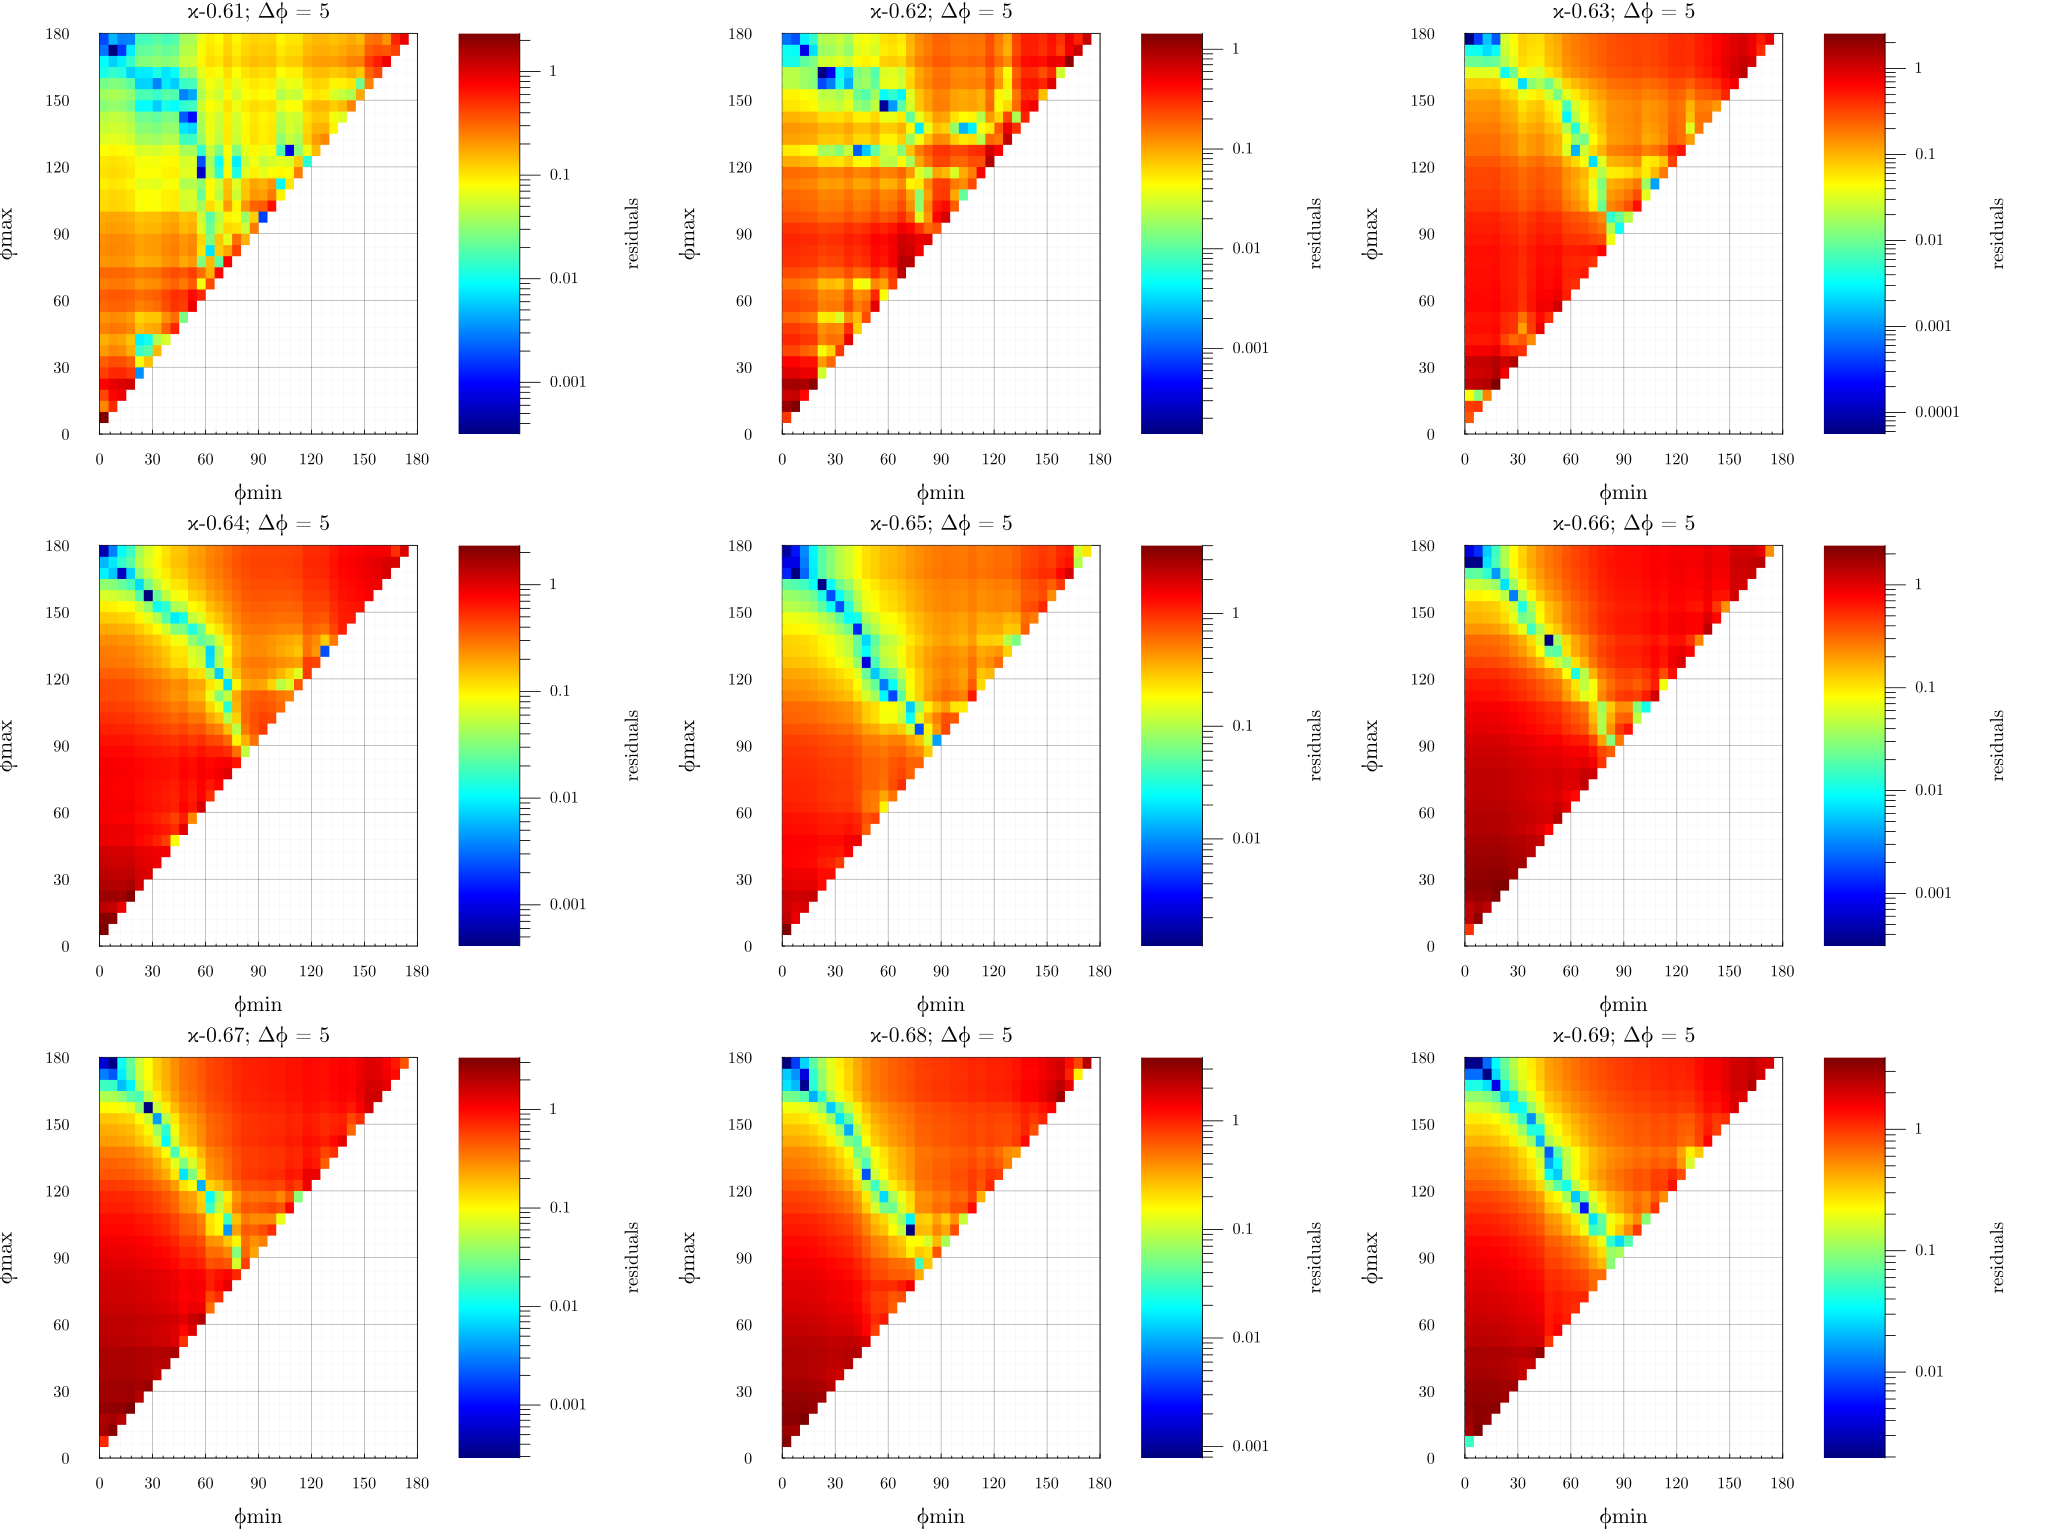

In [121]:
hmsResiduals = plot(
    hmresiduals[1],
    hmresiduals[2],
    hmresiduals[3],
    hmresiduals[4],
    hmresiduals[5],
    hmresiduals[6],
    hmresiduals[7],
    hmresiduals[8],
    hmresiduals[9],
    size = (2400, 1800), 
    top_margin=2Plots.mm,
    left_margin=8Plots.mm,
    colorbar_scale = :log10,
    layout = @layout [ a b c ; d e f ; g h i ]
)

In [156]:
for i in 1:9
    kappa = -0.6 - i/100
    kappa = round(kappa, digits = 5)
    plot(
        hmresiduals[i], 
        hmMmin[i], 
        hmRelMmin[i],  
        size = (3200, 900), 
        plot_title = "κ = $kappa",
        left_margin = 18Plots.mm,
        bottom_margin = 18Plots.mm,
        layout = @layout [a b c]
    )
    
    savefig(joinpath(
        figDir, "ind/$i.png"
        ) 
    )
end

In [241]:
size([1 2 ; 3 4])

(2, 2)

### Angular Correlation analysis - gk method

In [103]:
dEmitted = 1 # dθdif in degrees
nBins    = Int(180 / dEmitted)
minAngle = 0
maxAngle = 180
binWidth = maxAngle / nBins

minEnergy = 500
maxEnergy = 3500
dEnergy   = 500

xPts = minAngle:dEmitted:maxAngle-dEmitted

dϕ = dEmitted               # step in ϕ, if same as bin width
sign = "p"                  # sign in get_cut_edges function
maxSteps = Int(180 / dϕ)    # max number of steps (slices)

180

In [109]:
means   = Vector{Float64}(undef, Int(180/dϕ))

for (i, ϕ) in enumerate(1:dϕ:180)
    cutEdges1 = get_cut_edges(ϕ - 1, 1, dϕ, "p")                    # provides the lower and upper cut 
    sdf       = @chain dfs[2] begin                                   # filter out the dataframe
#         @select(:theta, :phi, :weights)                       # keeps only the two angles columns
        @subset((cutEdges1[1] .<= :phi .<= cutEdges1[2]))  # keeps only rows where ϕ is within the cut edges
    end
    
    stats = get_slice_stats(
                            cutEdges1[1],  # ϕmin
                            cutEdges1[2],  # ϕmax
                            0,             # Emin
                            3500,          # Emax
                            Float64.(sdf.theta), 
                            dϕ,
                            )
    
    means[i] = stats[5] 
end

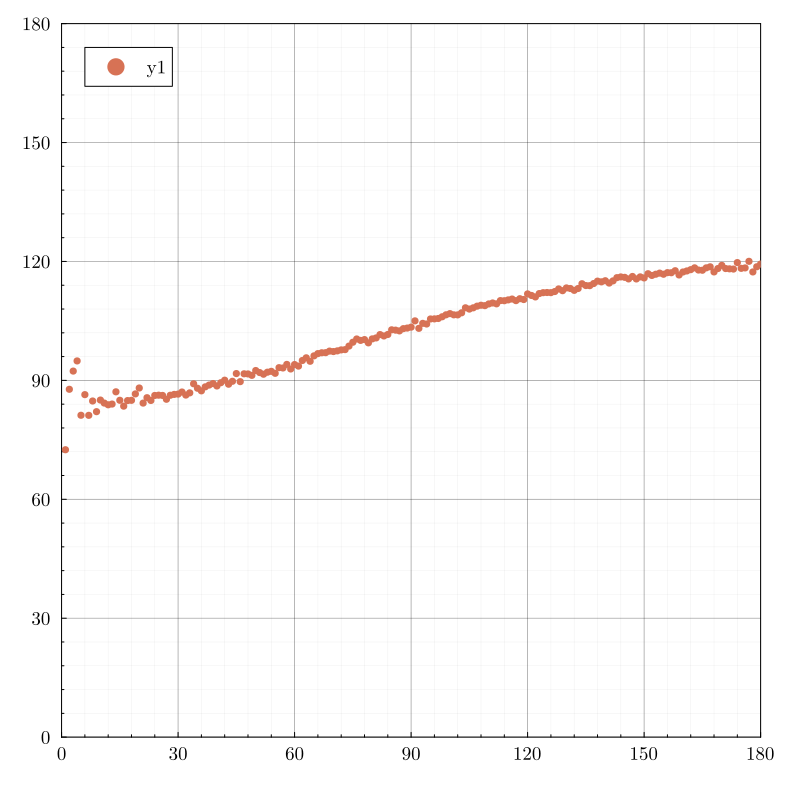

In [110]:
scatter(means, lims = (0,180))

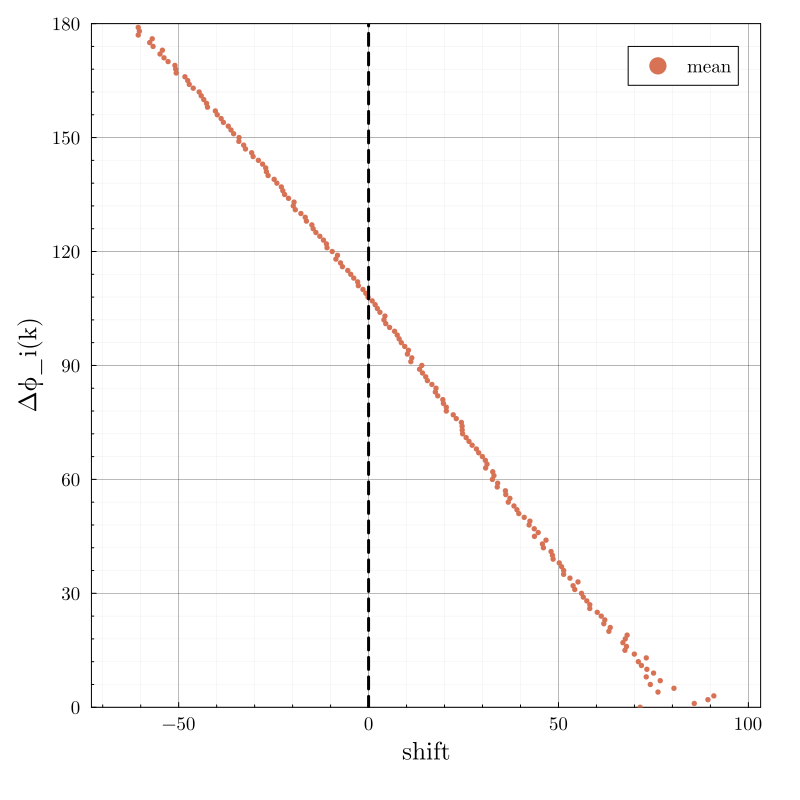

In [112]:
res_means = [ means[i] - MiscFuncs.y(i*dϕ) for i in 1:length(means) ]

scatter( res_means, xPts, ms = 3, label = "mean" , xlabel = "shift", ylabel ="Δϕ_i(k)", ylims = (0,180), aspect_ratio =1, legend = :topright)
vline!([0], label ="", c = :black, lw = 3, s=:dash)

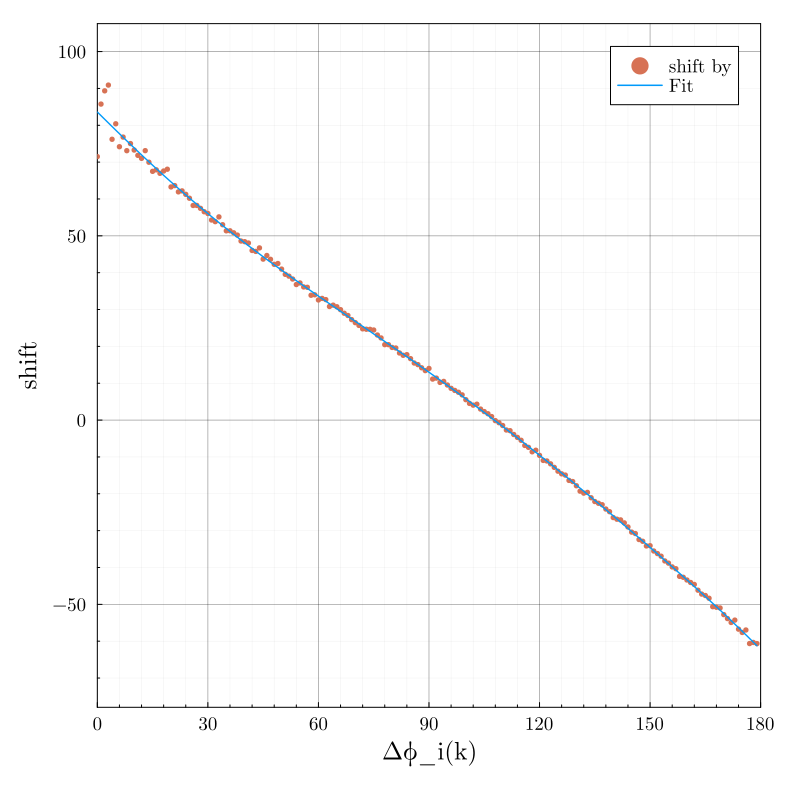

In [113]:
scatter(  xPts,res_means, ms = 3, label = "shift by" , ylabel = "shift", xlabel ="Δϕ_i(k)", xlims = (0,180), aspect_ratio =1, legend = :topright)
f1 = Polynomials.fit(xPts,  res_means, 6 )

plot!(f1, extrema(xPts)..., label="Fit")

In [115]:
modTree2 = @chain dfs[2] begin
    @rtransform :bin =  MiscFuncs.get_bin_center(:phi, Int(180/dϕ))  # create a vector of bin centers (which bin ϕ falls inside)
    @transform :phiOld = :phi                     # create a copy of the old ϕ (for comparison only)

    @rtransform :phi = :phi + res_means[Int(ceil(:bin/dϕ))] # shift ϕ by s: ϕ' = ϕ + s 
    @subset( 0 .< :phi .< 180) # keep only physical angles
end

881205×5 DataFrame
    Row │ phi       theta     kappa    bin      phiOld   
        │ Float64   Float32   Float64  Float64  Float32  
────────┼────────────────────────────────────────────────
      1 │  94.2691  145.756     -0.61     63.5   63.4507
      2 │ 107.85    138.306     -0.61    106.5  106.126
      3 │ 117.106    79.8517    -0.61    164.5  164.324
      4 │ 109.649    61.4143    -0.61    118.5  118.256
      5 │ 105.658   100.637     -0.61     97.5   97.6123
      6 │ 112.23    112.222     -0.61    127.5  127.16
   ⋮    │    ⋮         ⋮         ⋮        ⋮        ⋮
 881201 │ 112.811    94.7153    -0.61    129.5  129.491
 881202 │ 116.68    152.349     -0.61    155.5  155.501
 881203 │  95.0689  137.4       -0.61     62.5   62.3778
 881204 │ 115.3     133.059     -0.61    143.5  143.202
 881205 │ 112.855   131.26      -0.61    132.5  132.678
                                      881194 rows omitted

In [122]:
dfG2 = MiscFuncs.get_gs_df(modTree2, dϕ, sign, :theta, :phi)
matG2 = MiscFuncs.df_to_mat(dfG2);

LoadError: MethodError: no method matching get_gs_df(::DataFrame, ::Int64, ::String, ::String, ::String)
[0mClosest candidates are:
[0m  get_gs_df(::Any, ::Any, ::Any; _theta, _phi) at ~/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl:464
[0m  get_gs_df(::Any, ::Any) at ~/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl:464

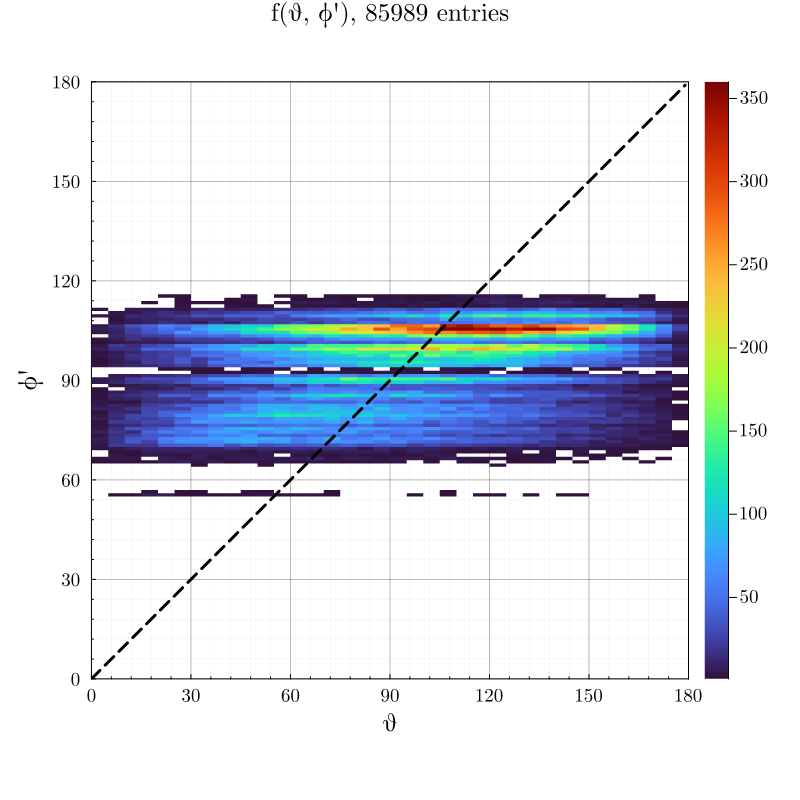

In [211]:
h2d2 = histogram2d(modTree2.theta, modTree2.phi,
    nbins        = (60, 60),
    xlabel       = "θ",
    ylabel       = "ϕ'",
    legend       = :topright,
    title        = string("f(θ, ϕ'), ", nrow(modTree2), " entries"),
    lims         = (0, 180),
    aspect_ratio = 1,
    right_margin = 6Plots.mm,
    c= :turbo
)
plot!(xPts, xPts, label ="", c= :black, style= :dash, lw =3)

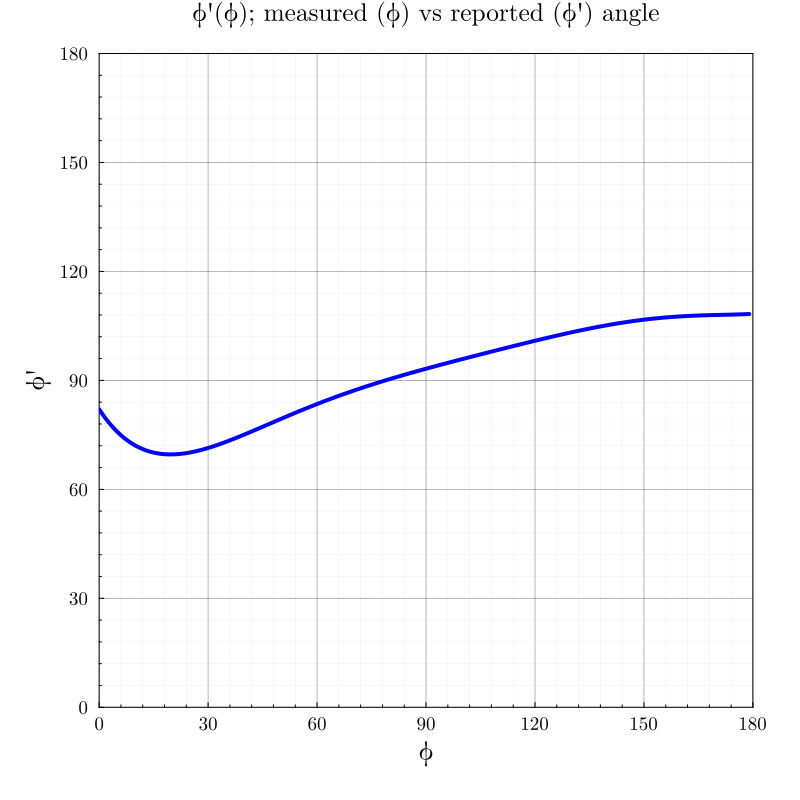

In [212]:
plot(
    xPts, xPts .+ f1.(xPts), lims = (0,180), lw = 4, c= :blue, 
    label ="", xlabel = "ϕ", ylabel ="ϕ'", aspect_ratio = 1, 
    title = "ϕ'(ϕ); measured (ϕ) vs reported (ϕ') angle"
)

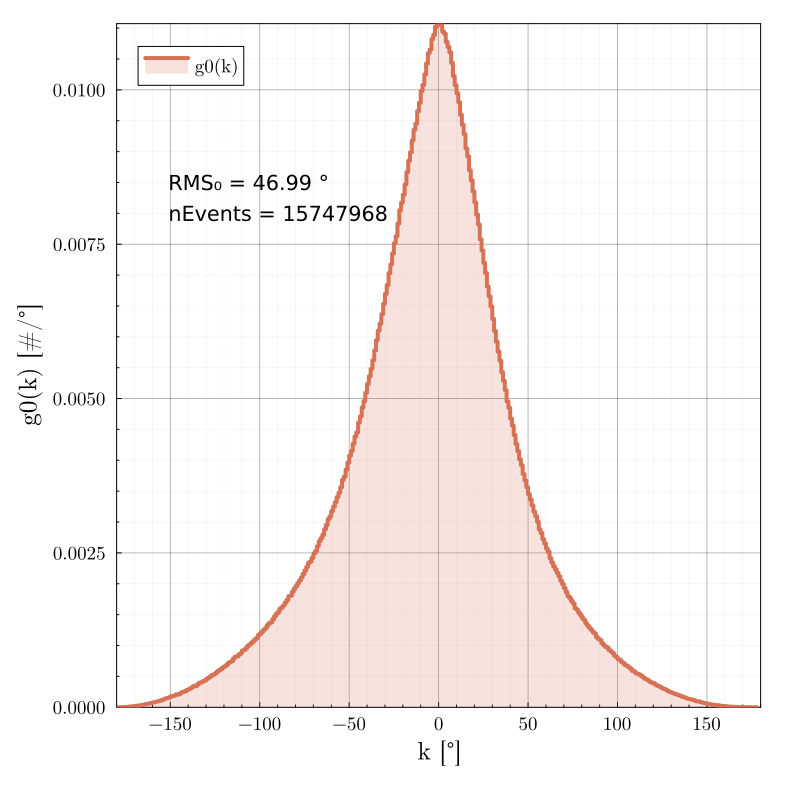

In [233]:
difs0 = dfs[1].theta .- dfs[1].phi    # array of ϕ - θ
rms0  = round(get_rms(difs0), digits = 2)
h0    = StatsBase.fit(Histogram, difs0, -180:180)
nEvents = nrow(dfs[1])

histogram(difs0, 
    xlims  = (-180,180), 
#     ylims  = (0, 1.1*maximum(h0.weights)), 
    nbins  = length(h0.edges[1]),
    xlabel = "k [°]",
    ylabel = "g0(k) [#/°]",
    label  = "g0(k)",
    lw     = 4,
    fillrange = 0,
    fillalpha = 0.2,
    norm = :pdf
)

annotate!((-150, 0.0085, text("RMS₀ = $rms0 °", 14, :left)))
annotate!((-150, 0.0080, text("nEvents = $nEvents ", 14, :left)))

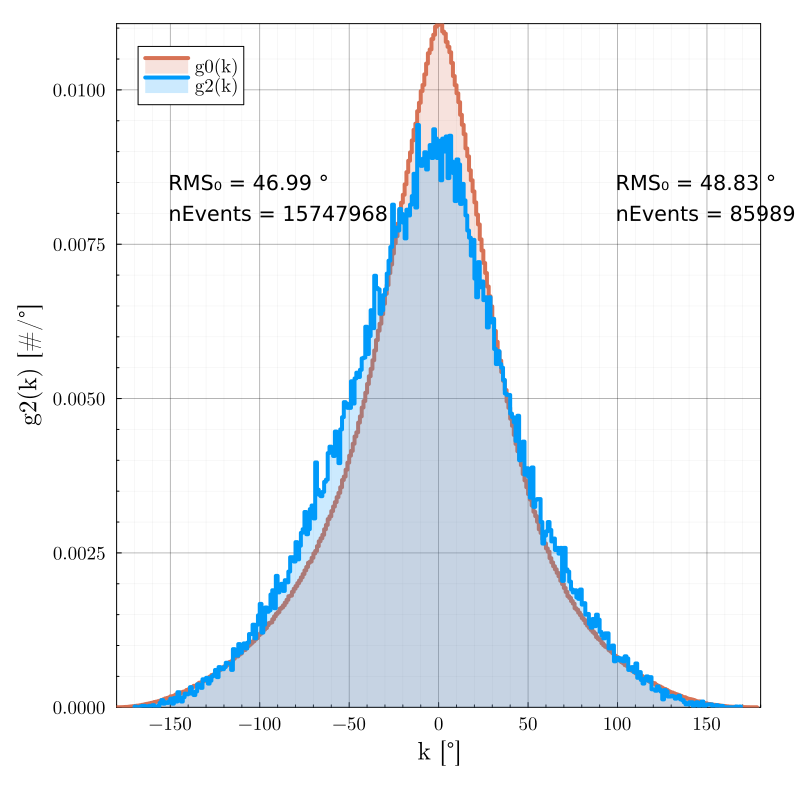

In [234]:
difs2 = dfs[2].theta .- dfs[2].phi    # array of ϕ - θ
rms2  = round(get_rms(difs2), digits = 2)
h2    = StatsBase.fit(Histogram, difs2, -180:180)
nEvents2 = nrow(dfs[2])

stephist!(difs2, 
    xlims  = (-180,180), 
#     ylims  = (0, 1.1*maximum(h2.weights)), 
    nbins  = length(h2.edges[1]),
    xlabel = "k [°]",
    ylabel = "g2(k) [#/°]",
    label  = "g2(k)",
    lw     = 4,
    fillrange = 0,
    fillalpha = 0.2,
    norm = :pdf

)

annotate!((100, 0.0085, text("RMS₀ = $rms2 °", 14, :left)))
annotate!((100, 0.008, text("nEvents = $nEvents2 ", 14, :left)))